In [1]:
from classy import Class

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import evogrowthpy as evgr

In [2]:
# First just compute several models without dark scatteing, ie. xi_ds=0.
# In all of these, as well as in the dark scattering cases I did two cases with PPF and without, to compare

models = ['PPF1','PPF2','FLD1','FLD2']
w0 = {'PPF1':-0.9,'PPF2':-1.1,'FLD1':-0.9,'FLD2':-1.1}
useppf = {'PPF1':'yes','PPF2':'yes','FLD1':'no','FLD2':'no'}

cosmo = {}

for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,
               'omega_b':0.022,'omega_cdm':0.104976,
               'cs2_fld':1.,
               'w0_fld':w0[M],'wa_fld':0.0,'xi_ds':0.0,'Omega_Lambda':0.,'gauge':'Newtonian',
               'use_ppf':useppf[M],'dark_scattering':'yes'})
    if useppf[M]=='yes':
        cosmo[M].set({'c_gamma_over_c_fld' : 0.4})


    cosmo[M].compute()

In [3]:
# Then an LCDM case

cosmo_lcdm = Class()
cosmo_lcdm.set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,
               'omega_b':0.022,'omega_cdm':0.104976,'gauge':'Newtonian'})

cosmo_lcdm.compute()

In [4]:
# Finally, the dark scattering case

cosmo_ds = {}

xi_ds=100.

for M in models:
    cosmo_ds[M] = Class()
    cosmo_ds[M].set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,
               'omega_b':0.022,'omega_cdm':0.104976,
               'cs2_fld':1.,
               'w0_fld':w0[M],'wa_fld':0.0,'xi_ds':xi_ds,'Omega_Lambda':0.,'gauge':'Newtonian',
               'use_ppf':useppf[M],'dark_scattering':'yes'})

    if useppf[M]=='yes':
        cosmo_ds[M].set({'c_gamma_over_c_fld' : 0.4})    


    cosmo_ds[M].compute()

/var/folders/4l/_9w3fqyd1dlbmpktt2dxlg740000gn/T/ipykernel_22219/1755347199.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(l,cl['tt']/cl_lcdm['tt'],label='wCDM')
/var/folders/4l/_9w3fqyd1dlbmpktt2dxlg740000gn/T/ipykernel_22219/1755347199.py:9: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(l,cl_ds['tt']/cl_lcdm['tt'],label='wCDM+DS')


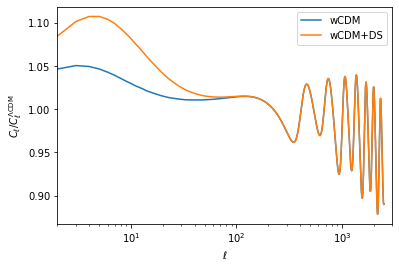

In [5]:
# TT Cl comparison for one case

cl = cosmo['FLD1'].raw_cl()
cl_ds = cosmo_ds['FLD1'].raw_cl()
cl_lcdm = cosmo_lcdm.raw_cl()
l = cl['ell']

plt.semilogx(l,cl['tt']/cl_lcdm['tt'],label='wCDM')
plt.semilogx(l,cl_ds['tt']/cl_lcdm['tt'],label='wCDM+DS')

plt.xlim([2,3000])
#plt.ylim([6e-11,1e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell/C_\ell^\mathrm{\Lambda CDM}$')
plt.legend()

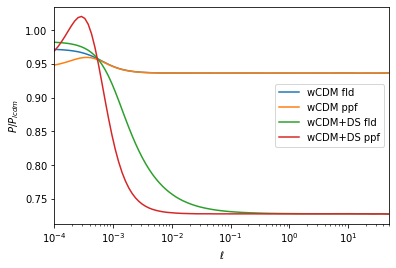

In [6]:
# Comparison of matter power spectra also between ppf and non-ppf

k_arr=np.geomspace(1e-4,50,100)
h=0.7

Pk_fld = np.array([cosmo['FLD1'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf = np.array([cosmo['PPF1'].pk(k, 0.0)*h*h*h for k in k_arr])

Pk_fld_ds = np.array([cosmo_ds['FLD1'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf_ds = np.array([cosmo_ds['PPF1'].pk(k, 0.0)*h*h*h for k in k_arr])

Pk_lcdm = np.array([cosmo_lcdm.pk(k, 0.0)*h*h*h for k in k_arr])

plt.semilogx(k_arr,Pk_fld/Pk_lcdm,label='wCDM fld')
plt.semilogx(k_arr,Pk_ppf/Pk_lcdm,label='wCDM ppf')

plt.semilogx(k_arr,Pk_fld_ds/Pk_lcdm,label='wCDM+DS fld')
plt.semilogx(k_arr,Pk_ppf_ds/Pk_lcdm,label='wCDM+DS ppf')
plt.xlim([1e-4,50])
#plt.ylim([6e-11,1e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$P/P_{lcdm}$')
plt.legend()

In [7]:
# Code used for the calculation of growth factors. 
# Essentially a wrapper for that calculation as is done in ReACT, which I can send you

'''
h=0.7
Om0=(0.104976+0.022)/h**2

D_norm_lcdm=evgr.get_growth_wrap(Om0,h,[0.0,-1.0,0.])[0]

D2=evgr.get_growth_wrap(Om0,h,[0.0,-0.9,0.0])[0]/D_norm_lcdm
D2_ds=evgr.get_growth_wrap(Om0,h,[0.0,-0.9,xi_ds])[0]/D_norm_lcdm


'''

'\nh=0.7\nOm0=(0.104976+0.022)/h**2\n\nD_norm_lcdm=evgr.get_growth_wrap(Om0,h,[0.0,-1.0,0.])[0]\n\nD2=evgr.get_growth_wrap(Om0,h,[0.0,-0.9,0.0])[0]/D_norm_lcdm\nD2_ds=evgr.get_growth_wrap(Om0,h,[0.0,-0.9,xi_ds])[0]/D_norm_lcdm\n\n\n'

In [8]:
# Some growth factors computed externally for comparison (using xi=100)

D_wcdm = 0.9675464498376791
D_ds = 0.8296136945161088

# A correction is needed, since it is only DM that interacts, but the result includes linear baryons
Rc=0.104976/(0.104976+0.022)
Corr_ds=(Rc*D_ds+(1.-Rc)*D_wcdm)**2

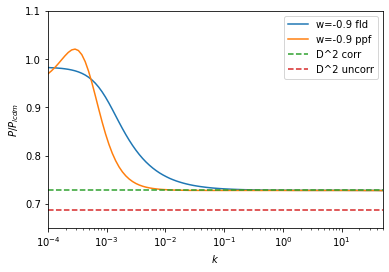

In [9]:
# Comparison with the growth factors above, showing the need for a correction

plt.semilogx(k_arr,Pk_fld_ds/Pk_lcdm,label='w=-0.9 fld')
plt.semilogx(k_arr,Pk_ppf_ds/Pk_lcdm,label='w=-0.9 ppf')
plt.semilogx(k_arr,k_arr**0*Corr_ds,'--',label='D^2 corr')
plt.semilogx(k_arr,k_arr**0*D_ds**2,'--',label='D^2 uncorr')

plt.xlim([1e-4,50])
plt.ylim([0.65,1.1])
plt.xlabel(r'$k$')
plt.ylabel(r'$P/P_{lcdm}$')
plt.legend()

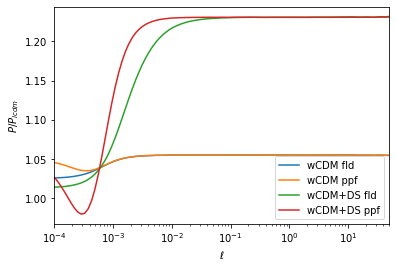

In [10]:
# Same as before but for w=-1.1

k_arr=np.geomspace(1e-4,50,100)
h=0.7

Pk_fld_w11 = np.array([cosmo['FLD2'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf_w11 = np.array([cosmo['PPF2'].pk(k, 0.0)*h*h*h for k in k_arr])

Pk_fld_ds_w11 = np.array([cosmo_ds['FLD2'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf_ds_w11 = np.array([cosmo_ds['PPF2'].pk(k, 0.0)*h*h*h for k in k_arr])



plt.semilogx(k_arr,Pk_fld_w11/Pk_lcdm,label='wCDM fld')
plt.semilogx(k_arr,Pk_ppf_w11/Pk_lcdm,label='wCDM ppf')

plt.semilogx(k_arr,Pk_fld_ds_w11/Pk_lcdm,label='wCDM+DS fld')
plt.semilogx(k_arr,Pk_ppf_ds_w11/Pk_lcdm,label='wCDM+DS ppf')
plt.xlim([1e-4,50])
#plt.ylim([6e-11,1e-9])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$P/P_{lcdm}$')
plt.legend()